# Plot Data Distributions

In [6]:
import pandas as pd
import numpy as np

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_theme(
    context="paper", 
    style="whitegrid", 
    font_scale=1.2,
    rc={'figure.figsize': (10, 10), 'figure.dpi': 300}
)
from common.binning import bin_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get Data

In [2]:
from common.data import get_data
from common.paths import HEALTHY, ADHD

X, Y, demographics, population = get_data(label_path=ADHD)
ages, sexes = demographics['Age'], demographics['Sex']

print(f'X: {X.shape} | Y: {len(Y.keys())} | Age: {ages.shape} | Population: {population}')

X: (373, 34716) | Y: 6 | Age: (373,) | Population: adhd


## Plot Distributions

### Sex

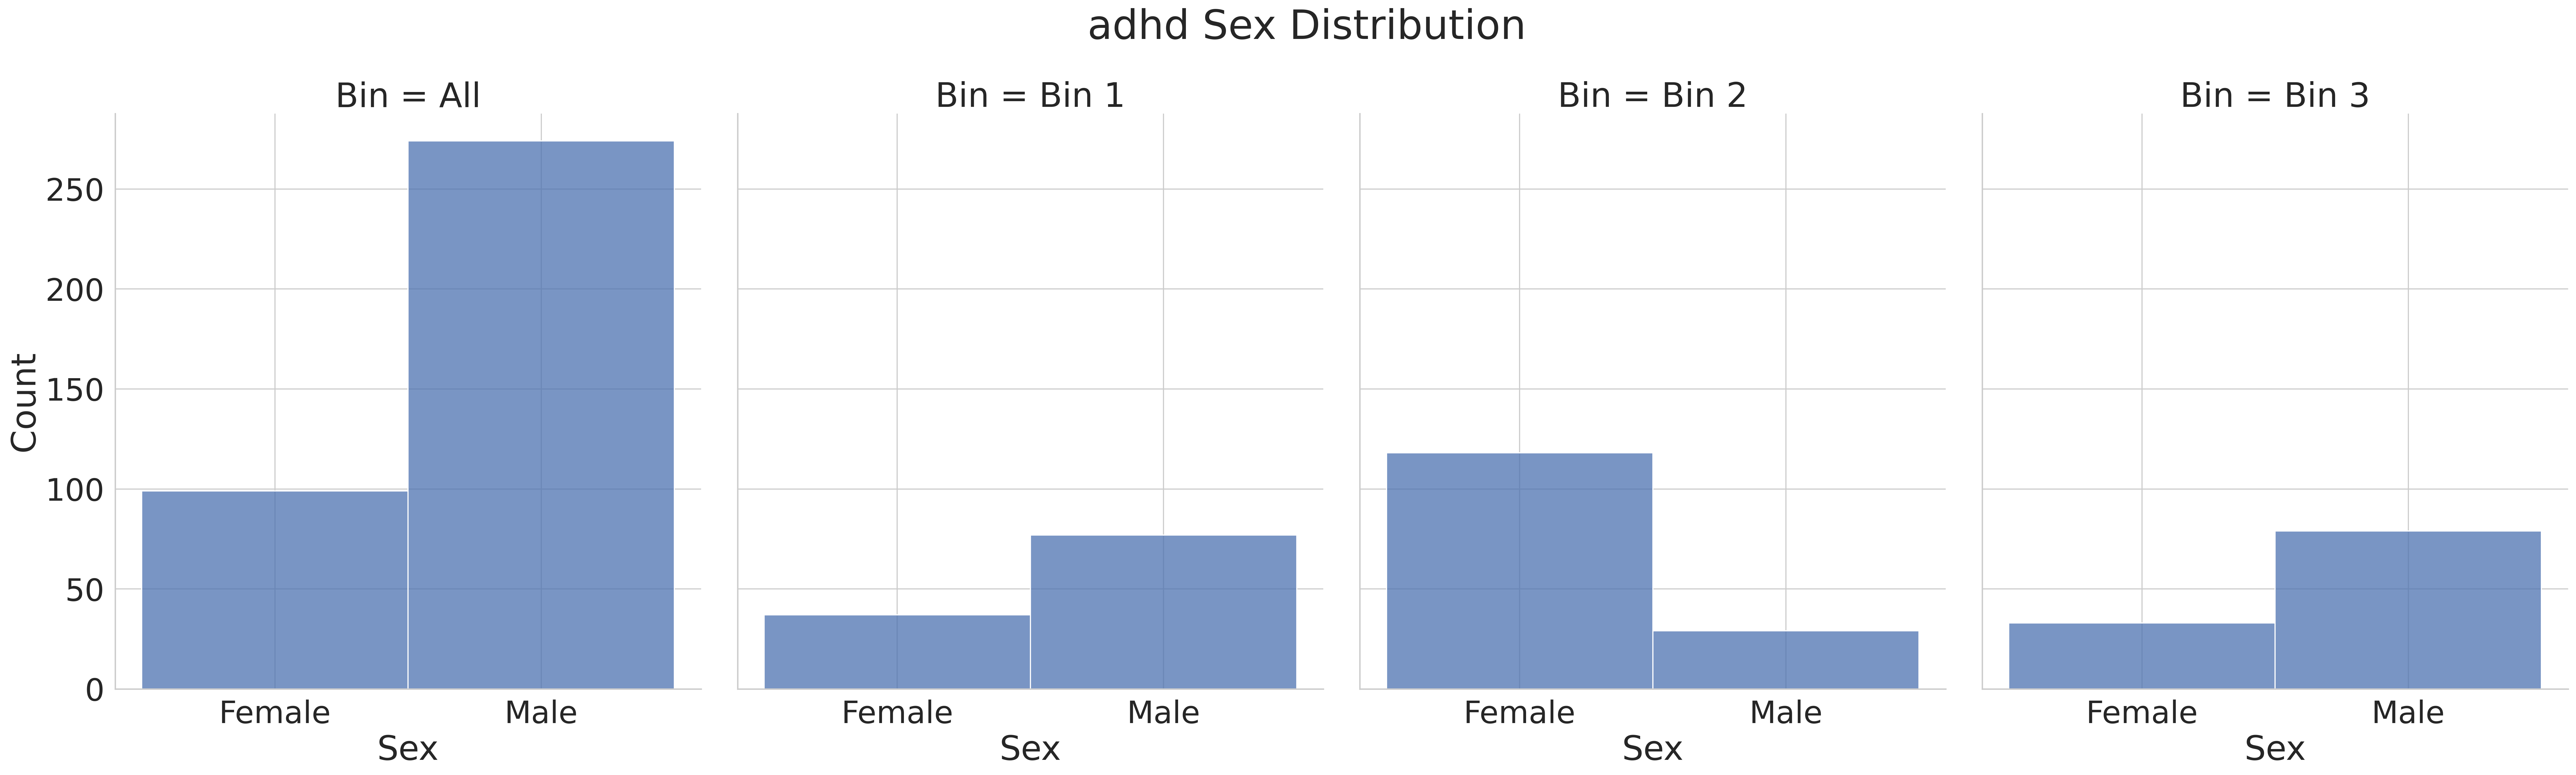

In [15]:
_, bin_sexes, bin_labels = bin_data(X, sexes, ages, True, 3)

sex_data = [{'Sex': sex, 'Bin': bin_label} for sex, bin_label in zip(bin_sexes, bin_labels)]

df = pd.DataFrame(sex_data).explode('Sex')
sex_key = {0: 'Male', 1: 'Female'}
df['Sex'] = df['Sex'].replace(sex_key)
# display(df)

with sns.plotting_context("notebook", font_scale=2.5):
    g = sns.FacetGrid(df, col="Bin", sharex=True, sharey=True, height=10, aspect=0.8)
    g.map(sns.histplot, 'Sex')
    g.set_ylabels('Count')
    g.fig.subplots_adjust(top=0.85)
    g.fig.suptitle(f"{population} Sex Distribution")

### Age

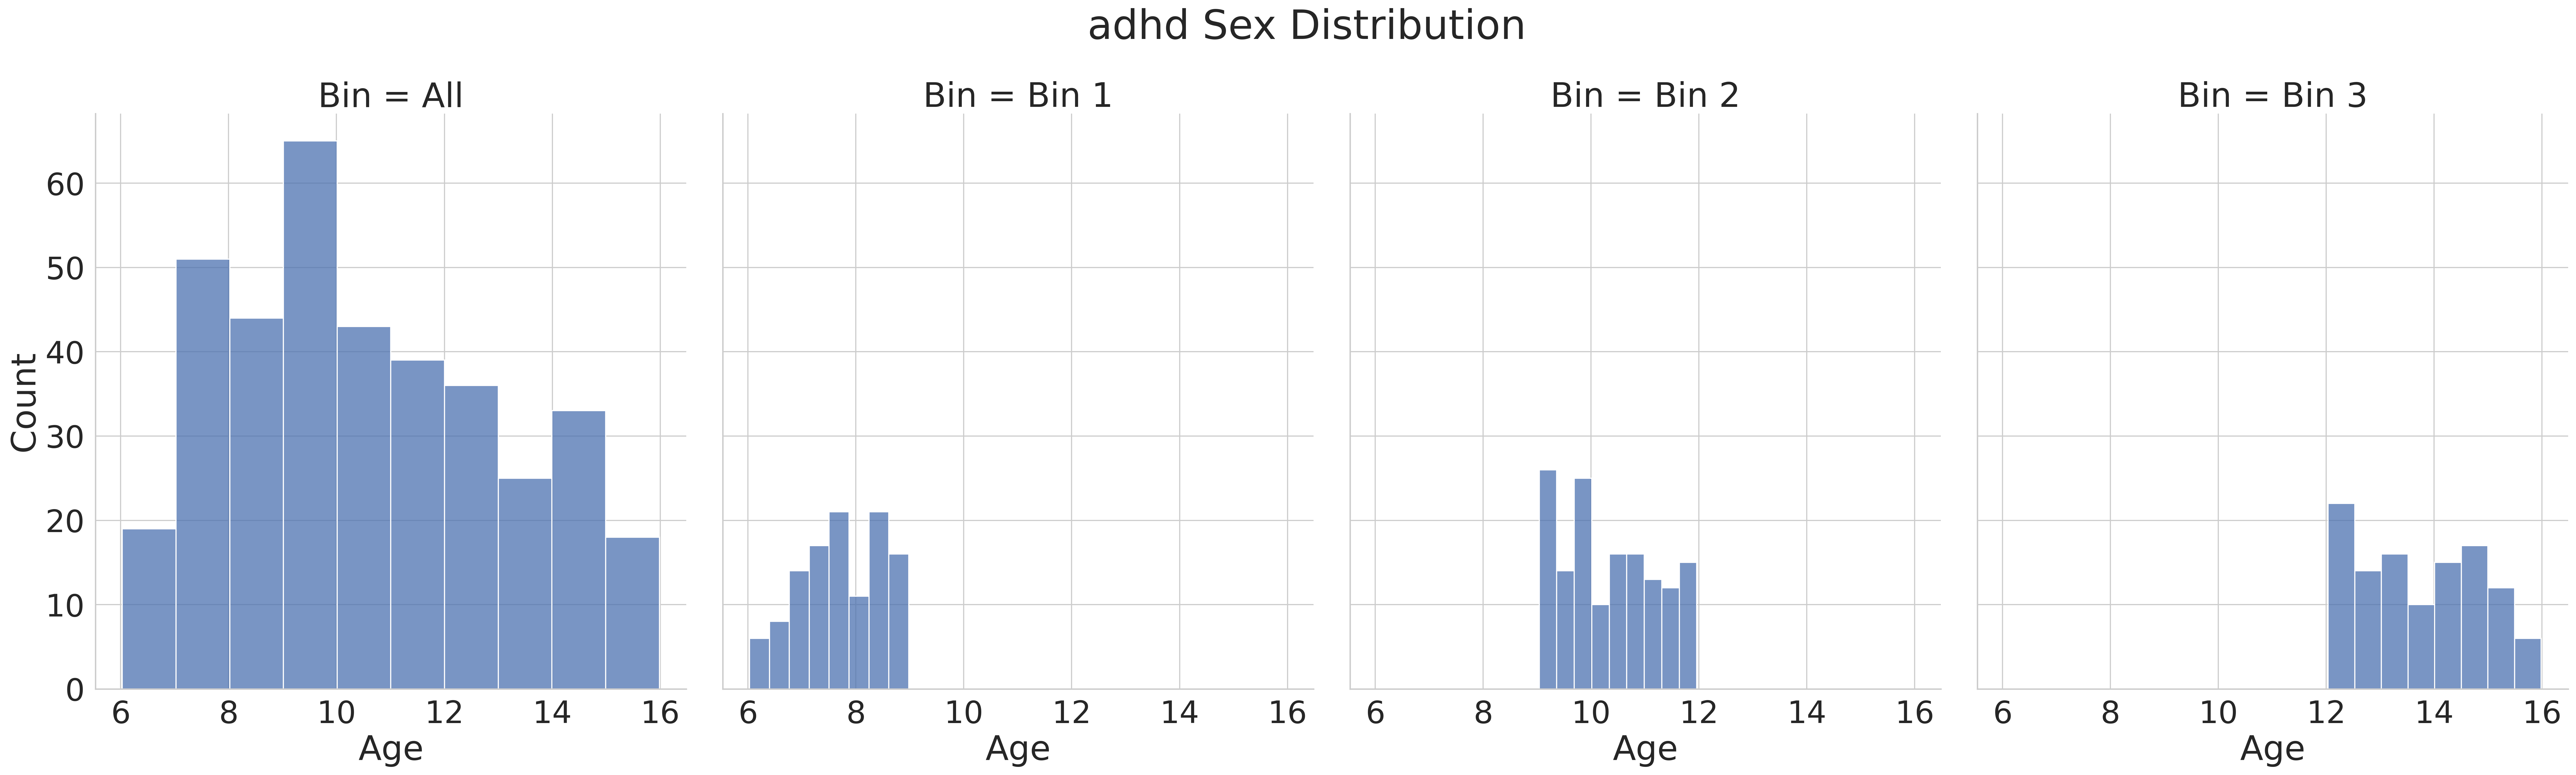

In [19]:
_, bin_ages, bin_labels = bin_data(X, ages, ages, True, 3)

age_data = [{'Age': age, 'Bin': bin_label} for age, bin_label in zip(bin_ages, bin_labels)]

df = pd.DataFrame(age_data).explode('Age')
# display(df)

with sns.plotting_context("notebook", font_scale=2.5):
    g = sns.FacetGrid(df, col="Bin", sharex=True, sharey=True, height=10, aspect=0.8)
    g.map(sns.histplot, 'Age')
    g.set_ylabels('Count')
    g.fig.subplots_adjust(top=0.85)
    g.fig.suptitle(f"{population} Sex Distribution")

### WISC

In [ ]:
from common.wisc import WISC_LEVEL

bin, target, value

